# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

[Fornecemos alguns comentários para guiar sua linha de raciocínio enquanto você trabalha neste projeto. Entretanto, certifique-se de remover todos os comentários entre colchetes antes de enviar o projeto.]

[Antes de começar a análise dos dados, explique com suas próprias palavras o propósito do projeto e as ações que planeja realizar.]

[Tenha em mente que estudar, modificar e analisar dados é um processo iterativo. É normal retornar a etapas anteriores e corrigir/expandir algo para permitir as próximas etapas.]

## Inicialização

In [132]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
import scipy.stats as stats


## Carregue os dados

In [133]:
# Carregue os arquivos de dados em diferentes DataFrames
calls = pd.read_csv(r'C:\Users\Usuário\Documents\Projetos TripleTen\Sprint4\megaline_calls.csv')
internet = pd.read_csv(r'C:\Users\Usuário\Documents\Projetos TripleTen\Sprint4\megaline_internet.csv')
messages = pd.read_csv(r'C:\Users\Usuário\Documents\Projetos TripleTen\Sprint4\megaline_messages.csv')
plans = pd.read_csv(r'C:\Users\Usuário\Documents\Projetos TripleTen\Sprint4\megaline_plans.csv')
users = pd.read_csv(r'C:\Users\Usuário\Documents\Projetos TripleTen\Sprint4\megaline_users.csv')


## Prepare os dados

[Os dados deste projeto estão divididos em várias tabelas. Explore cada uma para obter uma compreensão inicial dos dados. Faça correções em cada tabela, se necessário.]

## Planos

In [134]:
# Imprima informações gerais/resumo sobre o DataFrame dos planos
plans.info()
plans.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [135]:
# Imprima uma amostra de dados dos planos
plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]
*Na verificação de planos a tabela demostra ausência de valores. Apresentam números inteiro, float, contendo dois planos: surf e ultimate.* 

## Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [136]:
print(plans.isna().sum())
print(f"Número de linhas duplicadas: {plans.duplicated().sum()}")

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64
Número de linhas duplicadas: 0


## Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]
*Converter mb_per_month_included (megabytes incluídos por mês) para gb_per_month_included (gigabytes incluídos por mês). Fator de Conversão: 1 GB = 1024 MB.*

In [137]:
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024
plans['gb_per_month_included'] = np.ceil(plans['gb_per_month_included']).astype(int)
print(plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  
0                     15  
1                     30  


## Usuários

In [138]:
# Imprima informações gerais/resumo sobre o DataFrame dos usuários
users.info()
users.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [139]:
# Imprima uma amostra de dados dos usuários

users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]
*Através do código isna() e duplicated() caso seja necessário.*

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [140]:
print(users.isna().sum())
print(f"Número de linhas duplicadas: {users.duplicated().sum()}")
print(users.head())

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64
Número de linhas duplicadas: 0
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]


In [141]:
users['reg_year'] = pd.to_datetime(users['reg_date']).dt.year
print(users.head())


   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  reg_year  
0  2018-12-24  ultimate        NaN      2018  
1  2018-08-13      surf        NaN      2018  
2  2018-10-21      surf        NaN      2018  
3  2018-01-28      surf        NaN      2018  
4  2018-05-23      surf        NaN      2018  


## Chamadas

In [142]:
# Imprima informações gerais/resumo sobre o DataFrame das chamadas
calls.info()
calls.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [143]:
# Imprima uma amostra de dados das chamadas
calls.head()


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]
*Verificar se há valores 0 na duração arredondada (se a regra for que 0 também conta como 1).  Aplicando o arredondamento para o minuto inteiro mais próximo.*

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [144]:
print(f"Número de duplicatas no DataFrame 'calls': {calls.duplicated().sum()}")

Número de duplicatas no DataFrame 'calls': 0


In [145]:
calls['duration_rounded'] = np.ceil(calls['duration'] / 60)
calls['duration'] = calls['duration'].apply(np.ceil)
calls['duration'] = calls['duration'].replace(0)
print("Resumo estatístico da coluna 'duration' após arredondamento:")
print(calls['duration'].describe())
print("Verificando algumas durações após arredondamento (as 10 primeiras):")
print(calls[['id', 'duration']].head(10))

Resumo estatístico da coluna 'duration' após arredondamento:
count    137735.000000
mean          8.876197
std           5.347848
min           1.000000
25%           5.000000
50%           8.000000
75%          12.000000
max          38.000000
Name: duration, dtype: float64
Verificando algumas durações após arredondamento (as 10 primeiras):
         id  duration
0   1000_93       9.0
1  1000_145      14.0
2  1000_247      15.0
3  1000_309       6.0
4  1000_380       5.0
5  1000_388       3.0
6  1000_510       6.0
7  1000_521      15.0
8  1000_530       6.0
9  1000_544       5.0


C:\Users\Usuário\AppData\Local\Temp\ipykernel_332\788820732.py:3: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  calls['duration'] = calls['duration'].replace(0)


In [146]:
print("Número de chamadas com duração 0 após arredondamento (se houver):")
print(calls[calls['duration'] == 0].shape[0])

Número de chamadas com duração 0 após arredondamento (se houver):
0


### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [147]:
calls['duration'] = np.ceil(calls['duration']).astype(int)
monthly_calls = calls.groupby('user_id')['duration'].sum().reset_index()
monthly_calls.rename(columns={'duration': 'total_minutes_calls'}, inplace=True)
print(calls.head())

         id  user_id   call_date  duration  duration_rounded
0   1000_93     1000  2018-12-27         9               1.0
1  1000_145     1000  2018-12-27        14               1.0
2  1000_247     1000  2018-12-27        15               1.0
3  1000_309     1000  2018-12-28         6               1.0
4  1000_380     1000  2018-12-30         5               1.0


## Mensagens

In [148]:
# Imprima informações gerais/resumo sobre o DataFrame das mensagens
messages.info()
messages.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [149]:
# Imprima uma amostra dos dados das mensagens
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]*Verificação.  Não há problemas óbvios de dados ausentes ou de arredondamento como no caso das chamadas, já que mensagens SMS são geralmente contadas individualmente e não têm duração.*

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [150]:
print(f"Número de duplicatas no DataFrame 'messages': {messages.duplicated().sum()}")

Número de duplicatas no DataFrame 'messages': 0


In [151]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
print(messages.head())
messages['month'] = messages['message_date'].dt.month
print("Primeiras 5 linhas do DataFrame 'messages' com a coluna 'month':")
print(messages.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


Primeiras 5 linhas do DataFrame 'messages' com a coluna 'month':
         id  user_id message_date  month
0  1000_125     1000   2018-12-27     12
1  1000_160     1000   2018-12-31     12
2  1000_223     1000   2018-12-31     12
3  1000_251     1000   2018-12-27     12
4  1000_255     1000   2018-12-26     12


### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [152]:
monthly_messages = messages.groupby(['user_id', 'month']).agg(
    messages_count=('id', 'count') 
).reset_index() 
print("Contagem de mensagens por usuário e mês:")
print(monthly_messages.head())
print("Informações sobre o DataFrame 'monthly_messages':")
print(monthly_messages.info())

Contagem de mensagens por usuário e mês:
   user_id  month  messages_count
0     1000     12              11
1     1001      8              30
2     1001      9              44
3     1001     10              53
4     1001     11              36
Informações sobre o DataFrame 'monthly_messages':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   user_id         1806 non-null   int64
 1   month           1806 non-null   int32
 2   messages_count  1806 non-null   int64
dtypes: int32(1), int64(2)
memory usage: 35.4 KB
None


## Internet

In [153]:
# Imprima informações gerais/resumo sobre o DataFrame da internet
internet.info()
internet.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [154]:
#  Imprima uma amostra de dados para o tráfego da internet
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?] 
*Conversão da coluna. Criação de uma coluna. Regra de arredondamento de dados.

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [155]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['month'] = internet['session_date'].dt.month
internet['mb_used'] = internet['mb_used'].apply(np.ceil)
print(internet.head())

         id  user_id session_date  mb_used  month
0   1000_13     1000   2018-12-29     90.0     12
1  1000_204     1000   2018-12-31      0.0     12
2  1000_379     1000   2018-12-28    661.0     12
3  1000_413     1000   2018-12-26    271.0     12
4  1000_442     1000   2018-12-27    881.0     12


### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [156]:
monthly_internet = internet.groupby(['user_id', 'month']).agg(
    mb_used_sum=('mb_used', 'sum') 
).reset_index()
monthly_internet['gb_used_sum'] = monthly_internet['mb_used_sum'] / 1024
print("Consumo mensal de internet por usuário (monthly_internet):")
print(monthly_internet.head())
print("Informações sobre o DataFrame 'monthly_internet':")
print(monthly_internet.info())

Consumo mensal de internet por usuário (monthly_internet):
   user_id  month  mb_used_sum  gb_used_sum
0     1000     12       1903.0     1.858398
1     1001      8       6929.0     6.766602
2     1001      9      13333.0    13.020508
3     1001     10      22356.0    21.832031
4     1001     11      18524.0    18.089844
Informações sobre o DataFrame 'monthly_internet':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      2277 non-null   int64  
 1   month        2277 non-null   int32  
 2   mb_used_sum  2277 non-null   float64
 3   gb_used_sum  2277 non-null   float64
dtypes: float64(2), int32(1), int64(1)
memory usage: 62.4 KB
None


## Estude as condições dos planos

[É fundamental entender como os planos funcionam, ou seja, como as cobranças dos usuários são feitas com base na assinatura. Sugerimos imprimir as informações sobre os planos para visualizar novamente as condições.]

In [157]:
# Imprima as condições dos planos e certifique-se de que elas fazem sentido para você
print(plans.info())
print(plans.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
 8   gb_per_month_included  2 non-null      int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 276.0+ bytes
None
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_min

## Agregue os dados por usuário

[Agora, como os dados estão limpos, os agregue por usuário e por período para ter apenas um registro dessas informações. Isso vai facilitar muito as próximas análises.]

In [158]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['month'] = calls['call_date'].dt.month
calls_count_monthly = calls.groupby(['user_id', 'month']).agg(
    calls_made=('id', 'count') 
).reset_index()
print("Número de chamadas feitas por cada usuário por mês:")
print(calls_count_monthly.head())

print("Informações sobre o novo DataFrame 'calls_count_monthly':")
print(calls_count_monthly.info())


Número de chamadas feitas por cada usuário por mês:
   user_id  month  calls_made
0     1000     12          16
1     1001      8          27
2     1001      9          49
3     1001     10          65
4     1001     11          64
Informações sobre o novo DataFrame 'calls_count_monthly':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   user_id     2258 non-null   int64
 1   month       2258 non-null   int32
 2   calls_made  2258 non-null   int64
dtypes: int32(1), int64(2)
memory usage: 44.2 KB
None


In [159]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['duration'] = calls['duration'].apply(np.ceil) 
calls['month'] = calls['call_date'].dt.month
minutes_spent_monthly = calls.groupby(['user_id', 'month']).agg(
    minutes_used=('duration', 'sum') 
).reset_index()
print("Quantidade de minutos gastos por cada usuário por mês:")
print(minutes_spent_monthly.head())

print("Informações sobre o novo DataFrame 'minutes_spent_monthly':")
print(minutes_spent_monthly.info())

Quantidade de minutos gastos por cada usuário por mês:
   user_id  month  minutes_used
0     1000     12           124
1     1001      8           219
2     1001      9           414
3     1001     10           578
4     1001     11           575
Informações sobre o novo DataFrame 'minutes_spent_monthly':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   user_id       2258 non-null   int64
 1   month         2258 non-null   int32
 2   minutes_used  2258 non-null   int64
dtypes: int32(1), int64(2)
memory usage: 44.2 KB
None


In [160]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['month'] = messages['message_date'].dt.month
messages_count_monthly = messages.groupby(['user_id', 'month']).agg(
    messages_sent=('id', 'count') 
).reset_index()
print("Número de mensagens enviadas por cada usuário por mês:")
print(messages_count_monthly.head())

print("Informações sobre o novo DataFrame 'messages_count_monthly':")
print(messages_count_monthly.info())

Número de mensagens enviadas por cada usuário por mês:
   user_id  month  messages_sent
0     1000     12             11
1     1001      8             30
2     1001      9             44
3     1001     10             53
4     1001     11             36
Informações sobre o novo DataFrame 'messages_count_monthly':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   user_id        1806 non-null   int64
 1   month          1806 non-null   int32
 2   messages_sent  1806 non-null   int64
dtypes: int32(1), int64(2)
memory usage: 35.4 KB
None


In [161]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['month'] = internet['session_date'].dt.month
internet['mb_used'] = internet['mb_used'].apply(np.ceil)
traffic_volume_monthly = internet.groupby(['user_id', 'month']).agg(
    mb_used_total=('mb_used', 'sum') 
).reset_index()
traffic_volume_monthly['gb_used_total'] = traffic_volume_monthly['mb_used_total'] / 1024
traffic_volume_monthly['gb_used_total'] = traffic_volume_monthly['gb_used_total'].apply(np.ceil)
print("Volume de tráfego de internet (GB) usado por cada usuário por mês:")
print(traffic_volume_monthly.head())

print("Informações sobre o novo DataFrame 'traffic_volume_monthly':")
print(traffic_volume_monthly.info())

print("Resumo estatístico do tráfego de internet em GBs por mês:")
print(traffic_volume_monthly['gb_used_total'].describe())

Volume de tráfego de internet (GB) usado por cada usuário por mês:
   user_id  month  mb_used_total  gb_used_total
0     1000     12         1903.0            2.0
1     1001      8         6929.0            7.0
2     1001      9        13333.0           14.0
3     1001     10        22356.0           22.0
4     1001     11        18524.0           19.0
Informações sobre o novo DataFrame 'traffic_volume_monthly':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2277 non-null   int64  
 1   month          2277 non-null   int32  
 2   mb_used_total  2277 non-null   float64
 3   gb_used_total  2277 non-null   float64
dtypes: float64(2), int32(1), int64(1)
memory usage: 62.4 KB
None
Resumo estatístico do tráfego de internet em GBs por mês:
count    2277.000000
mean       17.007466
std         7.699111
min         1.000000
25%   

[Coloque os dados agregados em um DataFrame para que cada registro nele represente o que cada usuário consumiu em um determinado mês.]
*calls_count_monthly (número de chamadas feitas por mês)
minutes_spent_monthly (minutos gastos por mês)
messages_count_monthly (mensagens enviadas por mês)
traffic_volume_monthly (GBs de internet usados por mês).*

In [162]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month
monthly_usage = pd.merge(
    minutes_spent_monthly,
    messages_count_monthly,
    on=['user_id', 'month'],
    how='outer'
)
    


In [163]:
monthly_usage = pd.merge(
    monthly_usage,
    traffic_volume_monthly,
    on=['user_id', 'month'],
    how='outer'
)

In [164]:
monthly_usage = pd.merge(
    monthly_usage,
    calls_count_monthly,
    on=['user_id', 'month'],
    how='outer'
)

In [165]:
monthly_usage = monthly_usage.fillna(0)
int_cols = ['minutes_used', 'messages_sent', 'calls_made']
for col in int_cols:
    monthly_usage[col] = monthly_usage[col].astype(int)
    print("DataFrame consolidado de uso mensal por usuário (monthly_usage.head()):")
print(monthly_usage.head())

print("Informações gerais sobre o DataFrame 'monthly_usage' (monthly_usage.info()):")
print(monthly_usage.info())

print("Verificando se há valores NaN após o preenchimento:")
print(monthly_usage.isnull().sum())

DataFrame consolidado de uso mensal por usuário (monthly_usage.head()):
DataFrame consolidado de uso mensal por usuário (monthly_usage.head()):
DataFrame consolidado de uso mensal por usuário (monthly_usage.head()):
   user_id  month  minutes_used  messages_sent  mb_used_total  gb_used_total  \
0     1000     12           124             11         1903.0            2.0   
1     1001      8           219             30         6929.0            7.0   
2     1001      9           414             44        13333.0           14.0   
3     1001     10           578             53        22356.0           22.0   
4     1001     11           575             36        18524.0           19.0   

   calls_made  
0          16  
1          27  
2          49  
3          65  
4          64  
Informações gerais sobre o DataFrame 'monthly_usage' (monthly_usage.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 7 columns):
 #   Column         Non-

In [166]:
# Adicione as informações sobre o plano
print("Primeiras linhas do DataFrame 'plans':")
print(plans.head())
print("Nomes de planos únicos disponíveis:")
print(plans['plan_name'].unique())


Primeiras linhas do DataFrame 'plans':
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  
0                     15  
1                     30  
Nomes de planos únicos disponíveis:
['surf' 'ultimate']


[Calcule a receita mensal para cada usuário: subtraia o limite gratuito do pacote do número total de chamadas, mensagens de texto e dados; multiplique o resultado pelo valor do plano; adicione o preço mensal dependendo do plano. Importante: isso talvez não seja tão simples e necessite de várias linhas, considerando as condições do plano. Portanto, não se preocupe se você passar algum tempo nesta etapa.]

In [167]:
plans_details = {
    "surf": {
        "monthly_price": 20,
        "call_limit_minutes": 500,
        "messages_limit": 50,
        "data_limit_mb": 15 * 1024,  # 15 GB convertidos para MB
        "cost_per_minute_extra": 0.03,  # 3 centavos
        "cost_per_message_extra": 0.03, # 3 centavos
        "cost_per_gb_extra": 10      # $10 por GB extra
    },
    "ultimate": {
        "monthly_price": 70,
        "call_limit_minutes": 3000,
        "messages_limit": 1000,
        "data_limit_mb": 30 * 1024,  # 30 GB convertidos para MB
        "cost_per_minute_extra": 0.01,  # 1 centavo
        "cost_per_message_extra": 0.01, # 1 centavo
        "cost_per_gb_extra": 7       # $7 por GB extra
    }
}

print("Detalhes dos planos definidos:", plans_details)

Detalhes dos planos definidos: {'surf': {'monthly_price': 20, 'call_limit_minutes': 500, 'messages_limit': 50, 'data_limit_mb': 15360, 'cost_per_minute_extra': 0.03, 'cost_per_message_extra': 0.03, 'cost_per_gb_extra': 10}, 'ultimate': {'monthly_price': 70, 'call_limit_minutes': 3000, 'messages_limit': 1000, 'data_limit_mb': 30720, 'cost_per_minute_extra': 0.01, 'cost_per_message_extra': 0.01, 'cost_per_gb_extra': 7}}


In [168]:
# Calcule a receita mensal para cada usuário


def calculate_monthly_revenue(plan_name, used_minutes, used_messages, used_data_mb, plans_details):
    """
    Calculates the monthly revenue for a user based on their plan and usage.

    Args:
        plan_name (str): The name of the plan ('surf' or 'ultimate').
        used_minutes (int): Total minutes used by the user.
        used_messages (int): Total messages sent by the user.
        used_data_mb (int): Total data used by the user in MB.
        plans_details (dict): A dictionary containing details for all plans.

    Returns:
        float: The total monthly revenue for the user.
    """
    if plan_name not in plans_details:
        raise ValueError("Invalid plan name provided.")

    plan = plans_details[plan_name]

    monthly_revenue = plan["monthly_price"]

    # Calculate extra call costs
    if used_minutes > plan["call_limit_minutes"]:
        extra_minutes = used_minutes - plan["call_limit_minutes"]
        monthly_revenue += extra_minutes * plan["cost_per_minute_extra"]

    # Calculate extra message costs
    if used_messages > plan["messages_limit"]:
        extra_messages = used_messages - plan["messages_limit"]
        monthly_revenue += extra_messages * plan["cost_per_message_extra"]

    # Calculate extra data costs
    if used_data_mb > plan["data_limit_mb"]:
        extra_data_mb = used_data_mb - plan["data_limit_mb"]
       
        extra_data_gb = (extra_data_mb + 1024)
        monthly_revenue += extra_data_gb * plan["cost_per_gb_extra"]

    return monthly_revenue


user_surf_revenue = calculate_monthly_revenue(
    plan_name="surf",
    used_minutes=600,
    used_messages=70,
    used_data_mb=18432,
    plans_details=plans_details
)
print(f"Monthly revenue for Surf user: ${user_surf_revenue:.2f}")


user_ultimate_revenue = calculate_monthly_revenue(
    plan_name="ultimate",
    used_minutes=3200,
    used_messages=1050,
    used_data_mb=35840, 
    plans_details=plans_details
)
print(f"Monthly revenue for Ultimate user: ${user_ultimate_revenue:.2f}")


user_surf_within_limits_revenue = calculate_monthly_revenue(
    plan_name="surf",
    used_minutes=400,
    used_messages=30,
    used_data_mb=10240, 
    plans_details=plans_details
)
print(f"Monthly revenue for Surf user (within limits): ${user_surf_within_limits_revenue:.2f}")


Monthly revenue for Surf user: $40983.60
Monthly revenue for Ultimate user: $43080.50
Monthly revenue for Surf user (within limits): $20.00


## Estude o comportamento do usuário

[Calcule algumas estatísticas descritivas úteis para os dados agregados, o que costuma revelar uma imagem geral capturada pelos dados. Desenhe gráficos úteis para ajudar na compreensão. Já que a tarefa principal é comparar os planos e decidir qual é mais rentável, as estatísticas e os gráficos devem ser calculados por plano.]

[Existem dicas relevantes nos comentários para as chamadas. Essas dicas não foram fornecidas para as mensagens e internet, mas o princípio do estudo estatístico é o mesmo em todos os casos.]

In [169]:
monthly_usage = monthly_usage.merge(users[['user_id', 'plan']], on='user_id', how='left')
monthly_usage.head()

,user_id,month,minutes_used,messages_sent,mb_used_total,gb_used_total,calls_made,plan
0,1000,12,124,11,1903.0,2.0,16,ultimate
1,1001,8,219,30,6929.0,7.0,27,surf
2,1001,9,414,44,13333.0,14.0,49,surf
3,1001,10,578,53,22356.0,22.0,65,surf
4,1001,11,575,36,18524.0,19.0,64,surf


### Chamadas

In [170]:
#Compare a duração média das chamadas de cada plano para cada mês.

                               
calls_with_plans = pd.merge(calls, users, on='user_id', how='left')


calls_with_plans['month'] = calls_with_plans['call_date'].dt.month


average_call_duration = monthly_usage.groupby(['plan', 'month'])['minutes_used'].mean().reset_index()

print("Duração Média das Chamadas por Plano e Mês:")
print(average_call_duration)


Duração Média das Chamadas por Plano e Mês:
        plan  month  minutes_used
0       surf      1    260.500000
1       surf      2    359.111111
2       surf      3    403.130435
3       surf      4    436.620000
4       surf      5    497.194805
5       surf      6    534.360825
6       surf      7    557.570248
7       surf      8    510.950617
8       surf      9    515.077320
9       surf     10    533.856540
10      surf     11    522.671378
11      surf     12    586.990566
12  ultimate      1    254.750000
13  ultimate      2    493.142857
14  ultimate      3    391.000000
15  ultimate      4    409.095238
16  ultimate      5    505.000000
17  ultimate      6    459.957447
18  ultimate      7    529.237288
19  ultimate      8    525.619718
20  ultimate      9    547.220930
21  ultimate     10    566.396226
22  ultimate     11    554.047244
23  ultimate     12    571.509934


C:\Users\Usuário\AppData\Local\Temp\ipykernel_332\2903987852.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Plano')


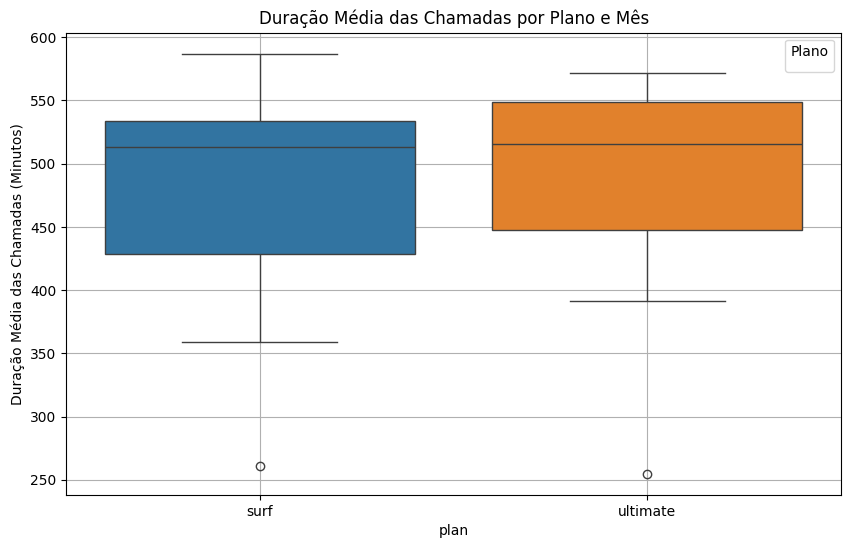

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=average_call_duration, x='plan', y='minutes_used', hue='plan')
plt.title('Duração Média das Chamadas por Plano e Mês')
plt.ylabel('Duração Média das Chamadas (Minutos)')
plt.grid(True)
plt.legend(title='Plano')
plt.show()


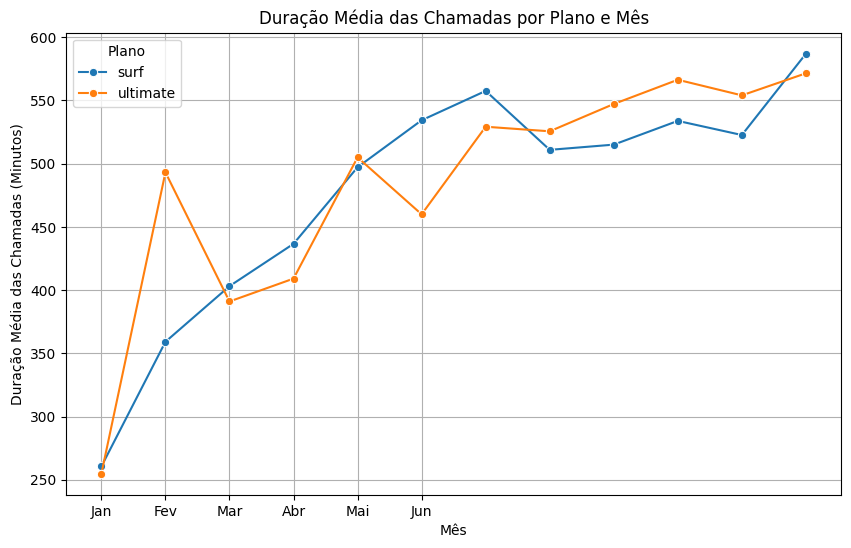

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=average_call_duration, x='month', y='minutes_used', hue='plan', marker='o')
plt.title('Duração Média das Chamadas por Plano e Mês')
plt.xlabel('Mês')
plt.ylabel('Duração Média das Chamadas (Minutos)')
plt.xticks(range(1, 7), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun'])
plt.grid(True)
plt.legend(title='Plano')
plt.show()

In [173]:
# Compare o número de minutos que os usuários de cada plano necessitam a cada mês. Construa um histograma.

calls_with_plans = pd.merge(calls, users, on='user_id', how='left')

calls_with_plans['month'] = calls_with_plans['call_date'].dt.month

total_monthly_minutes = calls_with_plans.groupby(['plan', 'month'])['duration'].sum().reset_index()


print("Total de Minutos Usados por Plano e Mês:")
print(total_monthly_minutes)


Total de Minutos Usados por Plano e Mês:
        plan  month  duration
0       surf      1       521
1       surf      2      3232
2       surf      3      9272
3       surf      4     21831
4       surf      5     38284
5       surf      6     51833
6       surf      7     67466
7       surf      8     82774
8       surf      9     99925
9       surf     10    126524
10      surf     11    147916
11      surf     12    186663
12  ultimate      1      1019
13  ultimate      2      3452
14  ultimate      3      4692
15  ultimate      4      8591
16  ultimate      5     14645
17  ultimate      6     21618
18  ultimate      7     31225
19  ultimate      8     37319
20  ultimate      9     47061
21  ultimate     10     60038
22  ultimate     11     70364
23  ultimate     12     86298


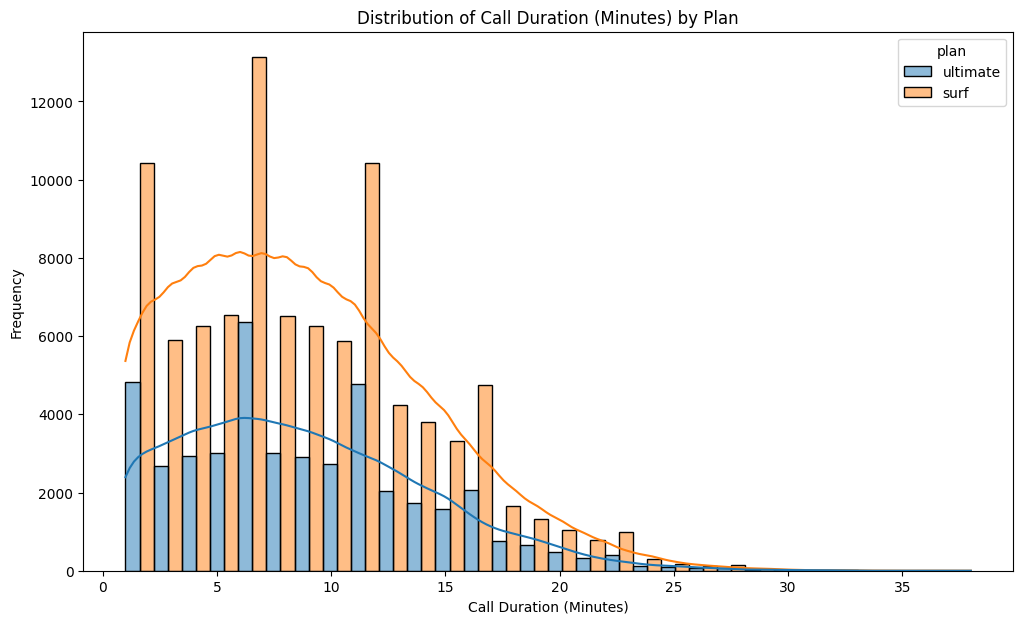

In [174]:
plt.figure(figsize=(12, 7))
sns.histplot(data=calls_with_plans, x='duration', hue='plan', multiple='dodge', bins=30, kde=True)
plt.title('Distribution of Call Duration (Minutes) by Plan')
plt.xlabel('Call Duration (Minutes)')
plt.ylabel('Frequency')
plt.show()


[Calcule a média e a variância da duração das chamadas para refletir se os usuários de cada plano possuem comportamentos diferentes sobre as chamadas.]

In [175]:
# Calcule a média e a variância da duração mensal das chamadas
monthly_call_stats = calls_with_plans.groupby('month')['duration'].agg(['mean', 'var']).reset_index()

print("Média e Variância da Duração Mensal das Chamadas:")
print(monthly_call_stats)

Média e Variância da Duração Mensal das Chamadas:
    month      mean        var
0       1  8.953488  26.301918
1       2  8.635659  29.279762
2       3  8.619753  27.756497
3       4  8.838466  28.209296
4       5  8.882195  28.841440
5       6  8.934558  29.453624
6       7  8.887078  28.303710
7       8  8.836865  28.279441
8       9  8.895842  28.742873
9      10  8.856912  28.618465
10     11  8.854813  28.391212
11     12  8.916215  28.734789


C:\Users\Usuário\AppData\Local\Temp\ipykernel_332\150368021.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='duration', data=calls_with_plans, palette='viridis')


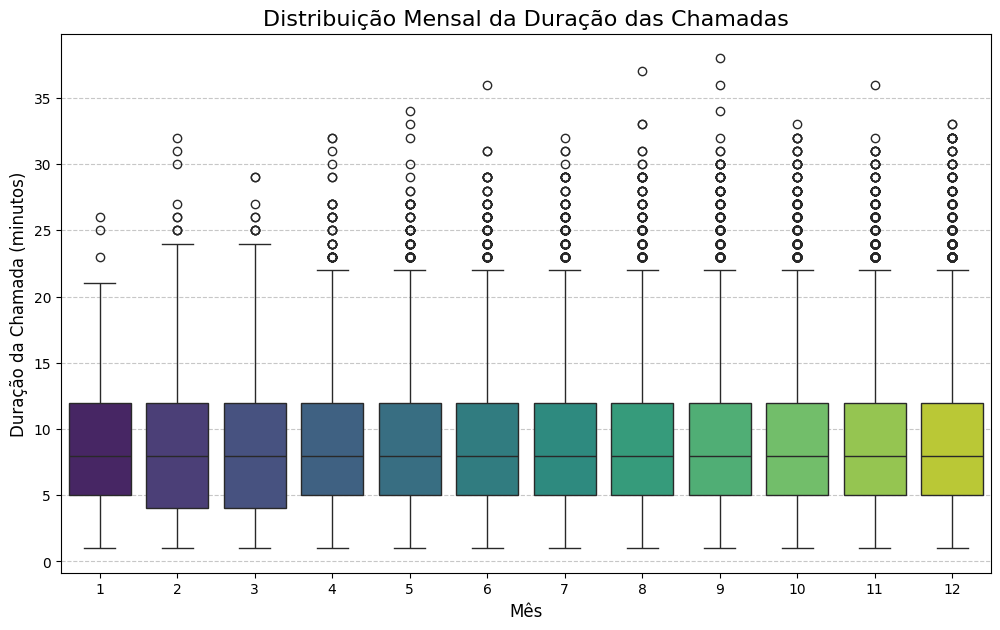

In [176]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas

plt.figure(figsize=(12, 7)) 
sns.boxplot(x='month', y='duration', data=calls_with_plans, palette='viridis')

plt.title('Distribuição Mensal da Duração das Chamadas', fontsize=16) 
plt.xlabel('Mês', fontsize=12) 
plt.ylabel('Duração da Chamada (minutos)', fontsize=12) 
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()


[Formule conclusões sobre como os usuários se comportam em termos de chamadas. O comportamento é diferente dependendo do plano?]
*Verificação da distribuição por chamada e por plano, há uma pequena diferença, no plano Surf é utilizado mais a chamada do que menssagem, já o plano Ultimate é o oposto, é utilizado mais menssagem que chamadas.*

### Mensagens

In [177]:
average_messages_per_plan = monthly_usage.groupby(['plan', 'month'])['messages_sent'].mean().reset_index()

print("Média de mensagens enviadas por plano:")
print(average_messages_per_plan)

Média de mensagens enviadas por plano:
        plan  month  messages_sent
0       surf      1      10.500000
1       surf      2      12.000000
2       surf      3      15.260870
3       surf      4      17.400000
4       surf      5      24.012987
5       surf      6      25.298969
6       surf      7      27.033058
7       surf      8      28.777778
8       surf      9      30.762887
9       surf     10      33.839662
10      surf     11      32.385159
11      surf     12      38.600629
12  ultimate      1      15.500000
13  ultimate      2      21.571429
14  ultimate      3      20.250000
15  ultimate      4      22.047619
16  ultimate      5      32.103448
17  ultimate      6      29.340426
18  ultimate      7      32.830508
19  ultimate      8      38.478873
20  ultimate      9      37.895349
21  ultimate     10      39.443396
22  ultimate     11      38.606299
23  ultimate     12      45.006623


C:\Users\Usuário\AppData\Local\Temp\ipykernel_332\2567205622.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='plan', y='messages_sent', data=monthly_usage, palette='Set2')


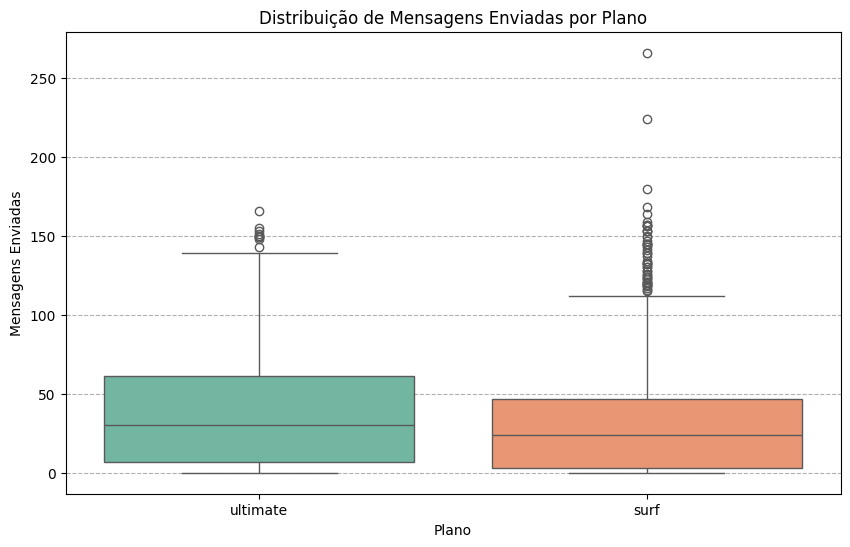

In [178]:

plt.figure(figsize=(10, 6)) 
sns.boxplot(x='plan', y='messages_sent', data=monthly_usage, palette='Set2') 
plt.title('Distribuição de Mensagens Enviadas por Plano')
plt.xlabel('Plano')
plt.ylabel('Mensagens Enviadas')
plt.grid(axis='y', linestyle='--') 
plt.show()







In [179]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano
traffic_with_plans = traffic_volume_monthly.merge(users[['user_id', 'plan']], on='user_id', how='left')

print("Volume de tráfego mensal com informações de plano:")
print(traffic_with_plans.head())
print("Informações sobre o DataFrame 'traffic_with_plans':")
print(traffic_with_plans.info())


average_gb_per_plan = traffic_with_plans.groupby('plan')['gb_used_total'].mean().reset_index()

print("Média de GBs de internet consumidos por plano:")
print(average_gb_per_plan)


Volume de tráfego mensal com informações de plano:
   user_id  month  mb_used_total  gb_used_total      plan
0     1000     12         1903.0            2.0  ultimate
1     1001      8         6929.0            7.0      surf
2     1001      9        13333.0           14.0      surf
3     1001     10        22356.0           22.0      surf
4     1001     11        18524.0           19.0      surf
Informações sobre o DataFrame 'traffic_with_plans':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2277 non-null   int64  
 1   month          2277 non-null   int32  
 2   mb_used_total  2277 non-null   float64
 3   gb_used_total  2277 non-null   float64
 4   plan           2277 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(1)
memory usage: 80.2+ KB
None
Média de GBs de internet consumidos por plano:
       pla

C:\Users\Usuário\AppData\Local\Temp\ipykernel_332\2981015701.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='plan', y='gb_used_total', data=average_gb_per_plan, palette='pastel')


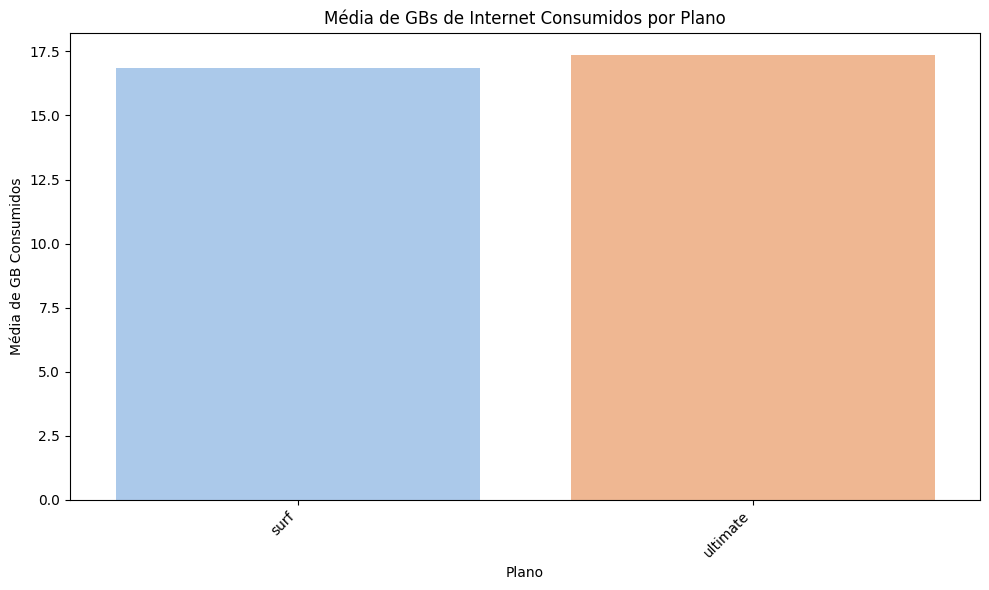

In [180]:
plt.figure(figsize=(10, 6))
sns.barplot(x='plan', y='gb_used_total', data=average_gb_per_plan, palette='pastel')
plt.xlabel('Plano')
plt.ylabel('Média de GB Consumidos')
plt.title('Média de GBs de Internet Consumidos por Plano')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()









[Formule conclusões sobre como os usuários costumam consumir o tráfego da internet. O comportamento é diferente dependendo do plano?]
*Há uma difença muito pequena, praticamente mínima, não diria que exista um comportamento diferente dos usários em relação aos planos.*

## Receita

[Da mesma forma que você estudou o comportamento dos usuários, descreva estatisticamente as receitas dos planos.]

In [181]:
monthly_usage = monthly_usage.merge(plans, right_on='plan_name', left_on='plan', how='left')
monthly_usage.head()

,user_id,month,minutes_used,messages_sent,mb_used_total,gb_used_total,calls_made,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,12,124,11,1903.0,2.0,16,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30
1,1001,8,219,30,6929.0,7.0,27,surf,50,15360,500,20,10,0.03,0.03,surf,15
2,1001,9,414,44,13333.0,14.0,49,surf,50,15360,500,20,10,0.03,0.03,surf,15
3,1001,10,578,53,22356.0,22.0,65,surf,50,15360,500,20,10,0.03,0.03,surf,15
4,1001,11,575,36,18524.0,19.0,64,surf,50,15360,500,20,10,0.03,0.03,surf,15


In [182]:
monthly_usage['mb_exceded'] = np.maximum(0, monthly_usage['mb_used_total'] - monthly_usage['mb_per_month_included'])
monthly_usage['gb_exceded'] = np.ceil(monthly_usage['mb_exceded'] / 1024)
monthly_usage['total_internet'] = monthly_usage['gb_exceded'] * monthly_usage['usd_per_gb']
monthly_usage['receita'] = monthly_usage['total_internet'] + monthly_usage['usd_monthly_pay']
monthly_usage.head()

,user_id,month,minutes_used,messages_sent,mb_used_total,gb_used_total,calls_made,plan,messages_included,mb_per_month_included,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,mb_exceded,gb_exceded,total_internet,receita
0,1000,12,124,11,1903.0,2.0,16,ultimate,1000,30720,...,70,7,0.01,0.01,ultimate,30,0.0,0.0,0.0,70.0
1,1001,8,219,30,6929.0,7.0,27,surf,50,15360,...,20,10,0.03,0.03,surf,15,0.0,0.0,0.0,20.0
2,1001,9,414,44,13333.0,14.0,49,surf,50,15360,...,20,10,0.03,0.03,surf,15,0.0,0.0,0.0,20.0
3,1001,10,578,53,22356.0,22.0,65,surf,50,15360,...,20,10,0.03,0.03,surf,15,6996.0,7.0,70.0,90.0
4,1001,11,575,36,18524.0,19.0,64,surf,50,15360,...,20,10,0.03,0.03,surf,15,3164.0,4.0,40.0,60.0


In [183]:
monthly_usage['qtd_messages'] = np.maximum(0, monthly_usage['messages_included'] - monthly_usage['messages_sent'])
monthly_usage['messages_total'] = monthly_usage['qtd_messages'] * monthly_usage['usd_per_message']
monthly_usage.head()

,user_id,month,minutes_used,messages_sent,mb_used_total,gb_used_total,calls_made,plan,messages_included,mb_per_month_included,...,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,mb_exceded,gb_exceded,total_internet,receita,qtd_messages,messages_total
0,1000,12,124,11,1903.0,2.0,16,ultimate,1000,30720,...,0.01,0.01,ultimate,30,0.0,0.0,0.0,70.0,989,9.89
1,1001,8,219,30,6929.0,7.0,27,surf,50,15360,...,0.03,0.03,surf,15,0.0,0.0,0.0,20.0,20,0.60
2,1001,9,414,44,13333.0,14.0,49,surf,50,15360,...,0.03,0.03,surf,15,0.0,0.0,0.0,20.0,6,0.18
3,1001,10,578,53,22356.0,22.0,65,surf,50,15360,...,0.03,0.03,surf,15,6996.0,7.0,70.0,90.0,0,0.00
4,1001,11,575,36,18524.0,19.0,64,surf,50,15360,...,0.03,0.03,surf,15,3164.0,4.0,40.0,60.0,14,0.42


In [184]:
monthly_usage['d_chamadas'] = np.maximum(0, monthly_usage['minutes_used'] - monthly_usage['minutes_included'])
monthly_usage['chamadas_total'] = monthly_usage['d_chamadas'] * monthly_usage['usd_per_minute']
monthly_usage.head()

,user_id,month,minutes_used,messages_sent,mb_used_total,gb_used_total,calls_made,plan,messages_included,mb_per_month_included,...,plan_name,gb_per_month_included,mb_exceded,gb_exceded,total_internet,receita,qtd_messages,messages_total,d_chamadas,chamadas_total
0,1000,12,124,11,1903.0,2.0,16,ultimate,1000,30720,...,ultimate,30,0.0,0.0,0.0,70.0,989,9.89,0,0.00
1,1001,8,219,30,6929.0,7.0,27,surf,50,15360,...,surf,15,0.0,0.0,0.0,20.0,20,0.60,0,0.00
2,1001,9,414,44,13333.0,14.0,49,surf,50,15360,...,surf,15,0.0,0.0,0.0,20.0,6,0.18,0,0.00
3,1001,10,578,53,22356.0,22.0,65,surf,50,15360,...,surf,15,6996.0,7.0,70.0,90.0,0,0.00,78,2.34
4,1001,11,575,36,18524.0,19.0,64,surf,50,15360,...,surf,15,3164.0,4.0,40.0,60.0,14,0.42,75,2.25


In [185]:
monthly_usage['receita'].mean()

np.float64(63.00915830789359)

In [186]:
receita_plano = monthly_usage.groupby([monthly_usage['plan'], monthly_usage['month']])['receita'].sum().reset_index()
receita_plano

,plan,month,receita
0,surf,1,40.0
1,surf,2,300.0
2,surf,3,1040.0
3,surf,4,1980.0
4,surf,5,3530.0
5,surf,6,4610.0
6,surf,7,7320.0
7,surf,8,10080.0
8,surf,9,10990.0
9,surf,10,15060.0


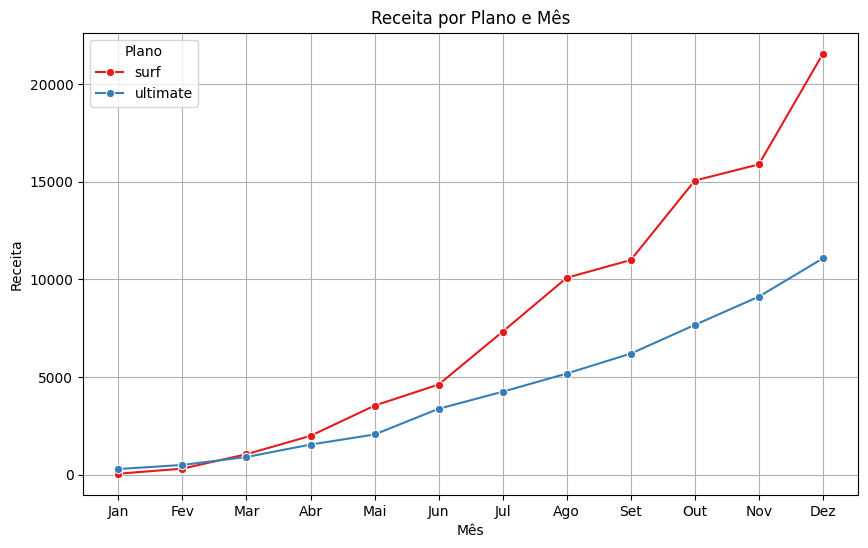

In [187]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=receita_plano, x='month', y='receita', hue='plan', marker='o', palette='Set1')
plt.title('Receita por Plano e Mês')
plt.xlabel('Mês')
plt.ylabel('Receita')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(True)
plt.legend(title='Plano')
plt.show()

[Formule conclusões sobre como a receita difere entre os planos.]
*Há diferenças na receita entre os planos.*

## Teste hipóteses estatísticas

[Teste a hipótese de que a receita média dos usuários dos planos Ultimate e Surf são diferentes.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

In [188]:
# Teste as hipóteses
receita_plano = monthly_usage.groupby([monthly_usage['plan'], monthly_usage['month']])['receita'].sum().reset_index()
receita_surf = monthly_usage[monthly_usage['plan'] == 'surf']['receita']
receita_ultimate = monthly_usage[monthly_usage['plan'] == 'ultimate']['receita']
receita_surf.var() == receita_ultimate.var()


np.False_

In [189]:
from scipy import stats as st
results = st.ttest_ind(receita_surf, receita_ultimate, equal_var=False)
print('p-value: ', results.pvalue)

p-value:  1.077197315189433e-20


In [190]:
if results.pvalue <= 0.05:
    print("Rejeitamos a hipótese nula. Há evidências de que a média é diferente") 
else:
    print("Não rejeitamos a hipótese nula.")

Rejeitamos a hipótese nula. Há evidências de que a média é diferente


[Teste a hipótese de que a receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

In [191]:
monthly_usage = monthly_usage.merge(users, right_on='user_id', left_on='user_id', how='left')
monthly_usage.head()


,user_id,month,minutes_used,messages_sent,mb_used_total,gb_used_total,calls_made,plan_x,messages_included,mb_per_month_included,...,d_chamadas,chamadas_total,first_name,last_name,age,city,reg_date,plan_y,churn_date,reg_year
0,1000,12,124,11,1903.0,2.0,16,ultimate,1000,30720,...,0,0.00,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,2018
1,1001,8,219,30,6929.0,7.0,27,surf,50,15360,...,0,0.00,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,2018
2,1001,9,414,44,13333.0,14.0,49,surf,50,15360,...,0,0.00,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,2018
3,1001,10,578,53,22356.0,22.0,65,surf,50,15360,...,78,2.34,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,2018
4,1001,11,575,36,18524.0,19.0,64,surf,50,15360,...,75,2.25,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,2018


In [192]:
monthly_usage['city'].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

In [193]:
receita_NY_NJ = monthly_usage[monthly_usage['city'].str.contains('NY-NJ')]['receita']
receita_region = monthly_usage[~monthly_usage['city'].str.contains('NY-NJ')]['receita']
receita_NY_NJ.var() == receita_region.var()

np.False_

In [194]:
results = st.ttest_ind(receita_NY_NJ, receita_region, equal_var=False)
print('p-value: ', results.pvalue)

p-value:  0.03150389499975021


In [195]:
if results.pvalue <= 0.05:
    print("Rejeitamos a hipótese nula. Há evidências de que a média é diferente") 
else:
    print("Não rejeitamos a hipótese nula.")

Rejeitamos a hipótese nula. Há evidências de que a média é diferente


## Conclusão geral

[Liste suas conclusões importantes nesta seção final, certifique-se de que elas cobrem todas as decisões (suposições) importantes que você tomou e que levaram à maneira como você processou e analisou os dados.]
*Não há evidências estatisticamente significativas para concluir que a renda média dos usuários na área de NY-NJ difere da dos usuários de outras regiões.*
Os usuários do plano Surf utilizada mais das chamadas (talvez por causa das menssagens esgotarem mais rápido). Os usuários do plano Ultimate utiliza mais das menssagens. Essas são diferenças significativas.*